<a href="https://colab.research.google.com/github/SunkaraboinaPraveenKumar/Machine_Learning_Projects/blob/main/AI_correction_App.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -q langgraph sentence-transformers spacy nltk transformers
!python -m spacy download en_core_web_sm

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.7/149.7 kB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.7/44.7 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 61.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 49.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 26.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 3.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 21.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
!pip install language-tool-python textstat

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 105.3/105.3 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 939.4/939.4 kB 23.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.3 MB/s eta 0:00:00


In [ ]:
from typing import Optional, Dict
from sentence_transformers import SentenceTransformer, util
import spacy
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from transformers import pipeline
import language_tool_python
import textstat
from dataclasses import dataclass

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('punkt_tab')

# Load NLP models
spacy_model = spacy.load("en_core_web_sm")
semantic_model = SentenceTransformer('all-MiniLM-L6-v2')
grammar_tool = language_tool_python.LanguageTool('en-US')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)
INFO:language_tool_python.download_lt:Unzipping /tmp/tmpf7e1ip2k.zip to /root/.cache/language_tool_python.
INFO:language_tool_python.download_lt:Downloaded https://www.languagetool.org/download/LanguageTool-6.4.zip to /root/.cache/language_tool_python.


In [ ]:
@dataclass
class PipelineState:
    teacher_text: Optional[str] = None
    student_text: Optional[str] = None
    teacher_text_clean: Optional[str] = None
    student_text_clean: Optional[str] = None
    tokenized_words: Optional[list] = None
    grammar_score: Optional[float] = None
    readability_score: Optional[float] = None
    syntactic_score: Optional[float] = None
    semantic_score: Optional[float] = None
    coherence_score: Optional[float] = None
    final_score: Optional[float] = None
    explanation: Optional[str] = None


In [ ]:
def ocr_node(state: PipelineState) -> PipelineState:
    print("OCR Node: Passing through provided text.")
    return state

In [ ]:
def text_cleaning_node(state: PipelineState) -> PipelineState:
    def clean_text(text):
        return " ".join(text.split()).strip()  # Removes extra spaces and trims

    state.teacher_text_clean = clean_text(state.teacher_text)
    state.student_text_clean = clean_text(state.student_text)

    print(f"Cleaned Student Text: {state.student_text_clean}")
    return state

In [ ]:
def tokenization_node(state: PipelineState) -> PipelineState:
    state.tokenized_words = word_tokenize(state.student_text_clean)

    print(f"Tokenized Words: {state.tokenized_words}")
    return state

In [ ]:
def stopword_removal_node(state: PipelineState) -> PipelineState:
    stop_words = set(stopwords.words("english"))
    state.tokenized_words = [word for word in state.tokenized_words if word.lower() not in stop_words]

    print(f"Words after Stopword Removal: {state.tokenized_words}")
    return state

In [ ]:
def grammar_check_node(state: PipelineState) -> PipelineState:
    matches = grammar_tool.check(state.student_text_clean)
    num_errors = len(matches)
    total_words = max(len(state.student_text_clean.split()), 1)
    state.grammar_score = 1 - (num_errors / total_words)

    print(f"Grammar Errors: {num_errors}, Score: {state.grammar_score:.2f}")
    return state

In [ ]:
def readability_analysis_node(state: PipelineState) -> PipelineState:
    score = textstat.flesch_reading_ease(state.student_text_clean)
    state.readability_score = max(0, min(score / 100, 1))  # Normalize to 0-1 range

    print(f"Readability Score: {state.readability_score:.2f}")
    return state

In [ ]:
def syntactic_analysis_node(state: PipelineState) -> PipelineState:
    doc = spacy_model(state.student_text_clean)
    num_sentences = len(list(doc.sents))
    state.syntactic_score = 0.9 if num_sentences >= 2 else 0.5

    print(f"Sentence Count: {num_sentences}, Syntactic Score: {state.syntactic_score:.2f}")
    return state

In [ ]:
def semantic_analysis_node(state: PipelineState) -> PipelineState:
    teacher_embedding = semantic_model.encode(state.teacher_text_clean, convert_to_tensor=True)
    student_embedding = semantic_model.encode(state.student_text_clean, convert_to_tensor=True)

    similarity = util.pytorch_cos_sim(teacher_embedding, student_embedding).item()
    state.semantic_score = similarity

    print(f"Semantic Similarity Score: {state.semantic_score:.2f}")
    return state

In [ ]:
def coherence_analysis_node(state: PipelineState) -> PipelineState:
    sentences = sent_tokenize(state.student_text_clean)
    embeddings = semantic_model.encode(sentences, convert_to_tensor=True)
    coherence_score = util.pytorch_cos_sim(embeddings[:-1], embeddings[1:]).mean().item()

    state.coherence_score = coherence_score

    print(f"Coherence Score: {state.coherence_score:.2f}")
    return state

In [ ]:
def evaluation_node(state: PipelineState) -> PipelineState:
    scores = [
        state.grammar_score,
        state.readability_score,
        state.syntactic_score,
        state.semantic_score,
        state.coherence_score
    ]
    state.final_score = sum(scores) / len(scores)

    state.explanation = f"""
    Your overall score is {state.final_score:.2f}.
    - Grammar: {state.grammar_score:.2f}
    - Readability: {state.readability_score:.2f}
    - Syntactic Complexity: {state.syntactic_score:.2f}
    - Semantic Match with Teacher: {state.semantic_score:.2f}
    - Logical Coherence: {state.coherence_score:.2f}
    """

    print(state.explanation)
    return state

In [ ]:
# Initialize state with teacher and student text
data = PipelineState(
    teacher_text="Charles Darwin’s Theory of Evolution by Natural Selection proposes that species evolve over time...",
    student_text="Darwin’s Theory of Evolution explains how living things change over time..."
)

# Execute pipeline nodes sequentially
data = text_cleaning_node(data)
data = tokenization_node(data)
data = stopword_removal_node(data)
data = grammar_check_node(data)
data = readability_analysis_node(data)
data = syntactic_analysis_node(data)
data = semantic_analysis_node(data)
data = coherence_analysis_node(data)
data = evaluation_node(data)

Cleaned Student Text: Darwin’s Theory of Evolution explains how living things change over time...
Tokenized Words: ['Darwin', '’', 's', 'Theory', 'of', 'Evolution', 'explains', 'how', 'living', 'things', 'change', 'over', 'time', '...']
Words after Stopword Removal: ['Darwin', '’', 'Theory', 'Evolution', 'explains', 'living', 'things', 'change', 'time', '...']
Grammar Errors: 0, Score: 1.00
Readability Score: 0.52
Sentence Count: 1, Syntactic Score: 0.50
Semantic Similarity Score: 0.80
Coherence Score: nan

    Your overall score is nan.
    - Grammar: 1.00
    - Readability: 0.52
    - Syntactic Complexity: 0.50
    - Semantic Match with Teacher: 0.80
    - Logical Coherence: nan
    


In [ ]:
!pip install langchain_groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.9/121.9 kB 4.4 MB/s eta 0:00:00


In [ ]:
import langgraph
from langgraph.graph import StateGraph
from sentence_transformers import SentenceTransformer, util
import spacy
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import language_tool_python
import textstat
from typing import Optional, Dict
from dataclasses import dataclass
from google.colab import userdata
import os
from langchain_groq import ChatGroq

os.environ['GROQ_API_KEY']=userdata.get('groq_api_key')

# Download required NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load NLP models
spacy_model = spacy.load("en_core_web_sm")
semantic_model = SentenceTransformer('all-MiniLM-L6-v2')
grammar_tool = language_tool_python.LanguageTool('en-US')
llm = ChatGroq(
    model_name="deepseek-r1-distill-llama-70b"
)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
/usr/local/lib/python3.11/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
import textstat
import math

In [ ]:
# Define state
@dataclass
class PipelineState:
    teacher_text: Optional[str] = None
    student_text: Optional[str] = None
    cleaned_text: Optional[str] = None
    semantic_score: Optional[float] = None
    syntactic_score: Optional[float] = None
    grammar_score: Optional[float] = None
    readability_score: Optional[float] = None
    final_score: Optional[float] = None
    llm_feedback: Optional[str] = None

# Define nodes
def preprocess_text(state: PipelineState) -> PipelineState:
    state.cleaned_text = " ".join(state.student_text.split()).strip()
    return state

def semantic_analysis(state: PipelineState) -> PipelineState:
    teacher_embedding = semantic_model.encode(state.teacher_text, convert_to_tensor=True)
    student_embedding = semantic_model.encode(state.cleaned_text, convert_to_tensor=True)
    state.semantic_score = util.pytorch_cos_sim(teacher_embedding, student_embedding).item()
    return state



In [ ]:
def syntactic_analysis(state: PipelineState) -> PipelineState:
    """Analyze sentence complexity using SMOG and ARI scores."""

    doc = spacy_model(state.cleaned_text)
    num_sentences = len(list(doc.sents))  # Count sentences

    # Use readability metrics for syntactic complexity
    smog_score = textstat.smog_index(state.cleaned_text)  # Higher = more complex
    ari_score = textstat.automated_readability_index(state.cleaned_text)  # Higher = more complex

    # Normalize scores (higher complexity → lower syntactic score)
    smog_normalized = max(0, min(1 - (smog_score / 20), 1))
    ari_normalized = max(0, min(1 - (ari_score / 20), 1))

    # Average the normalized scores
    state.syntactic_score = (smog_normalized + ari_normalized) / 2

    return state


In [ ]:
def grammar_analysis(state: PipelineState) -> PipelineState:
    """Analyzes grammatical correctness using LanguageTool."""
    matches = grammar_tool.check(state.cleaned_text)
    num_errors = len(matches)
    total_words = max(len(state.cleaned_text.split()), 1)

    # Normalize error count to a score between 0 and 1
    normalized_errors = num_errors / total_words
    state.grammar_score = max(0, min(1, 1 - math.log1p(normalized_errors)))  # log1p(x) = log(1 + x)

    return state

In [ ]:
def readability_analysis(state: PipelineState) -> PipelineState:
    """Analyzes readability using multiple metrics."""

    # Get readability scores
    flesch_score = textstat.flesch_reading_ease(state.cleaned_text)
    smog_score = textstat.smog_index(state.cleaned_text)  # Measures polysyllabic words per sentence
    ari_score = textstat.automated_readability_index(state.cleaned_text)  # Evaluates complexity based on character count per word

    # Normalize scores
    flesch_normalized = max(0, min((flesch_score + 30) / 130, 1))  # Shift to fit 0-1 scale
    smog_normalized = max(0, min(1 - (smog_score / 20), 1))  # Higher SMOG = harder to read
    ari_normalized = max(0, min(1 - (ari_score / 20), 1))  # Higher ARI = harder to read

    # Combine scores for a better measure of readability
    state.readability_score = (flesch_normalized + smog_normalized + ari_normalized) / 3

    return state


In [ ]:
def final_evaluation(state: PipelineState) -> PipelineState:
    scores = [
        state.semantic_score,
        state.syntactic_score,
        state.grammar_score,
        state.readability_score
    ]
    state.final_score = sum(scores) / len(scores)
    return state

# LLM feedback node
def llm_feedback_node(state: PipelineState) -> PipelineState:
    prompt = f"""
    Given the following analysis of a student's answer:

    - **Semantic Similarity Score**: {state.semantic_score}
    - **Syntactic Score**: {state.syntactic_score}
    - **Grammar Score**: {state.grammar_score}
    - **Readability Score**: {state.readability_score}

    Please generate a final score (0-100) and provide feedback on how the student can improve their answer.
    """

    response = llm.invoke(prompt)
    state.llm_feedback = response.content
    return state


In [ ]:
# Define the graph
graph = StateGraph(PipelineState)
graph.add_node("preprocess", preprocess_text)
graph.add_node("semantic", semantic_analysis)
graph.add_node("syntactic", syntactic_analysis)
graph.add_node("grammar", grammar_analysis)
graph.add_node("readability", readability_analysis)
graph.add_node("final_evaluation", final_evaluation)
graph.add_node("llm_feedback_final", llm_feedback_node)

# Define execution flow
graph.add_edge("preprocess", "semantic")
graph.add_edge("semantic", "syntactic")
graph.add_edge("syntactic", "grammar")
graph.add_edge("grammar", "readability")
graph.add_edge("readability", "final_evaluation")
graph.add_edge("final_evaluation", "llm_feedback_final")

graph.set_entry_point("preprocess")

# Compile the graph
app = graph.compile()


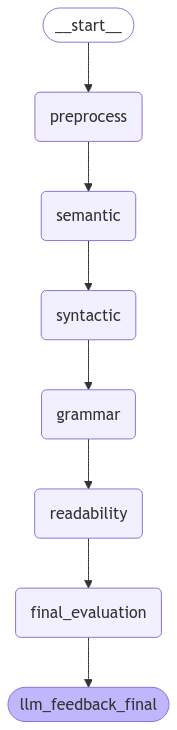

In [ ]:
app

In [ ]:
# Sample Input
data = PipelineState(
    teacher_text="Charles Darwin’s Theory of Evolution by Natural Selection proposes that species evolve over time...",
    student_text="Darwin’s Theory of Evolution explains how living things change over time..."
)

# Run pipeline
result = app.invoke(data)

# Output final LLM feedback
print("\nFinal LLM Feedback:\n", result['llm_feedback'])


Final LLM Feedback:
 <think>
Okay, so I need to figure out how to help this student improve their answer based on the scores provided. Let me start by understanding each of the scores given.

First, the Semantic Similarity Score is 0.799, which is pretty high. That means the student's answer is very close in meaning to the correct answer. They probably understood the question well and included most of the necessary points. But maybe there are some nuances or details they missed, so I should suggest they focus on including more specific details or examples to make their answer even more accurate.

Next, the Syntactic Score is 0.7025. This is a bit lower, so the structure of their sentences might not be as clear or varied as it could be. They might be using simpler sentence structures or maybe repeating the same patterns. I should advise them to work on using a mix of sentence lengths and structures to make their writing more engaging and sophisticated.

The Grammar Score is a perfect 1

In [88]:
!pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.0/20.0 MB 45.6 MB/s eta 0:00:00


In [90]:
!pip install reportlab

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.0 MB/s eta 0:00:00


In [91]:
from reportlab.lib.pagesizes import letter
from reportlab.pdfgen import canvas

def create_pdf(text, output_filename="output.pdf"):
    """Creates a PDF file from the given text."""
    c = canvas.Canvas(output_filename, pagesize=letter)
    width, height = letter
    c.setFont("Helvetica", 12)

    # Split text into lines
    lines = text.split("\n")
    y_position = height - 50  # Start from top

    for line in lines:
        c.drawString(50, y_position, line)
        y_position -= 15  # Move down for next line

        # If the page is full, create a new one
        if y_position < 50:
            c.showPage()
            c.setFont("Helvetica", 12)
            y_position = height - 50

    c.save()
    print(f"PDF saved as {output_filename}")

# Example usage
text = """
6. What is an E-mail? What are the different parts of an E-mail?
E-mail (electronic mail) is the most popular exchange of computer-stored messages
by telecommunication. A large percentage of the total traffic over the Internet is e
mail. E-mail can also be exchanged between online service provider users and in
networks other than the Internet, both public and private.
DIFFERENT PARTS OF EMAIL:
1. Sender: It is also known as the “from line,” this is the name subscribers will see
when they receive an email message .The sender name or from line is the outward
facing name subscribers will see and can be considered the mask for the reply-to
email address.
2. Subject: The art of the subject line: what every email marketer directs about. The
email subject line is one of the most researched and discussed components of email
marketing messages.
3. Pre-Header: A well-designed email includes a pre-header. Before subscriber sets
foot in store, s/he will look to see what sits at storefront window, especially the
email
4. Header: Moving from the pre-header to the header, the header is the first part of
email’s content. It’s the part of email template that does not change from email to
email
5. Content: The heart of email is content and images.The information which is to be
delivered to the subscriber should be clearly mentioned.
6. Context and Design: Depending on the kind of content sending, a well-designed
email can come in many forms and should always aim to generate a click.
7. Footer: The footer is critical which is generated by  email service provider; if it is
not, make sure to include this requirement at the development stage.
Unive
"""
create_pdf(text, "teacher.pdf")

# Download the PDF in Colab
from google.colab import files
files.download("teacher.pdf")

PDF saved as teacher.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [92]:
# Example usage
text = """
What is an Email? What are different parts of Email?
Email is a way peoples send messages on internet. It is very popular and mostly used for talking, sometimes for business, sometimes for fun. Many peoples use email every day for different things like sending homework, chatting with friends or sometimes just for nothing. It also work in different networks not only in internet but also in other places.

Different Parts of Email:
Sender: This is the person who send the email. Their name is show when someone receive it. Sometime the sender can be a person or sometimes a company sending ads.
Subject: The subject is very important because it tell what is inside the email. Some people don't read emails if subject is boring.
Pre-Header: This is like a small line before opening email. It’s like a trailer of movie but for email.
Header: This is part of email that come first. It don’t change much and mostly looks same in all emails.
Content: The content is the heart of email, it can be text, images or even just blank sometimes. Some people write very long emails but nobody read that much.
Context and Design: If email look nice, more people will read it. Some emails have colors and some just black and white, but all emails have words.
Footer: This is last part of email. Sometimes it have company address, sometimes it just say "Thank You" or some random stuff. If email is from a scam, footer might not be there.

"""
create_pdf(text, "student.pdf")

# Download the PDF in Colab
from google.colab import files
files.download("student.pdf")

PDF saved as student.pdf


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [95]:
#ocr
import fitz  # PyMuPDF

def extract_text_from_pdf(pdf_path):
    """Extracts text from a given PDF file."""
    doc = fitz.open(pdf_path)
    text = ""
    for page in doc:
        text += page.get_text("text") + "\n"
    return text

uploads = ['/content/teacher.pdf','/content/student.pdf']
# Extract text from each uploaded PDF
pdf_texts = {}
for filename in uploads:
    pdf_texts[filename] = extract_text_from_pdf(filename)

# Print extracted text
for filename, text in pdf_texts.items():
    print(f"\n--- Extracted Text from {filename} ---\n")
    print(text)


--- Extracted Text from /content/teacher.pdf ---

6. What is an E-mail? What are the different parts of an E-mail? 
E-mail (electronic mail) is the most popular exchange of computer-stored messages 
by telecommunication. A large percentage of the total traffic over the Internet is e
mail. E-mail can also be exchanged between online service provider users and in 
networks other than the Internet, both public and private. 
DIFFERENT PARTS OF EMAIL: 
1. Sender: It is also known as the “from line,” this is the name subscribers will see 
when they receive an email message .The sender name or from line is the outward 
facing name subscribers will see and can be considered the mask for the reply-to 
email address. 
2. Subject: The art of the subject line: what every email marketer directs about. The 
email subject line is one of the most researched and discussed components of email 
marketing messages.  
3. Pre-Header: A well-designed email includes a pre-header. Before subscriber sets 
foot

In [96]:
print(pdf_texts)

{'/content/teacher.pdf': '6. What is an E-mail? What are the different parts of an E-mail? \nE-mail (electronic mail) is the most popular exchange of computer-stored messages \nby telecommunication. A large percentage of the total traffic over the Internet is e\nmail. E-mail can also be exchanged between online service provider users and in \nnetworks other than the Internet, both public and private. \nDIFFERENT PARTS OF EMAIL: \n1. Sender: It is also known as the “from line,” this is the name subscribers will see \nwhen they receive an email message .The sender name or from line is the outward \nfacing name subscribers will see and can be considered the mask for the reply-to \nemail address. \n2. Subject: The art of the subject line: what every email marketer directs about. The \nemail subject line is one of the most researched and discussed components of email \nmarketing messages.  \n3. Pre-Header: A well-designed email includes a pre-header. Before subscriber sets \nfoot in store, 

In [97]:
# Sample Input
data = PipelineState(
    teacher_text=pdf_texts['/content/teacher.pdf'],
    student_text=pdf_texts['/content/student.pdf']
)

# Run pipeline
result = app.invoke(data)

# Output final LLM feedback
print("\nFinal LLM Feedback:\n", result['llm_feedback'])


Final LLM Feedback:
 <think>
Okay, so I need to figure out how to help this student improve their answer based on the scores provided. Let's break it down.

First, the Semantic Similarity Score is 0.813. That means the student's answer is pretty close to the target answer in terms of meaning, but maybe there's room for a bit more accuracy. Maybe they missed some key points or didn't elaborate enough on certain areas.

Next, the Syntactic Score is 0.655. That's lower, so the sentence structure might not be as clear or varied as it could be. Perhaps the student's sentences are a bit choppy or not well-connected. They could benefit from working on their sentence formation to make their writing flow better.

The Grammar Score is 0.959, which is really high. That means their writing is mostly free of grammatical errors. They have a good handle on the mechanics of writing, so that's a strong point.

The Readability Score is 0.709. This suggests that while the answer is understandable, it mi